In [52]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "ipl_2024_full_data.csv"
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Loaded Successfully!")
print(data.head())
print("\nBasic Information:")
print(data.info())


Dataset Loaded Successfully!
  Player Name Team Opponent Team  Match Date         Stadium  Matches Played  \
0    MS Dhoni  CSK            RR  2024-04-09    Rajiv Gandhi               1   
1    MS Dhoni  CSK          PBKS  2024-05-30    Eden Gardens               1   
2    MS Dhoni  CSK            MI  2024-05-27  Sawai Mansingh               1   
3    MS Dhoni  CSK            GT  2024-04-26     Chinnaswamy               1   
4    MS Dhoni  CSK           KKR  2024-04-15  Sawai Mansingh               1   

   Total Score  Individual Match Score      Bowler Name  Runs Given (Bowler)  \
0          482                      77  Ruturaj Gaikwad                   56   
1          379                      15         MS Dhoni                   21   
2          325                      33  Ravindra Jadeja                   33   
3           74                       6  Ravindra Jadeja                   28   
4           35                     115        Moeen Ali                   41   

   Wicket

In [53]:
# Function to plot Top Batsmen by Total Runs
def plot_top_batsmen(data, n=10):
    top_batsmen = data.groupby("Player Name")["Total Score"].sum().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis")
    plt.title("Top Batsmen by Total Runs", fontsize=16)
    plt.xlabel("Total Runs")
    plt.ylabel("Player Name")
    plt.tight_layout()
    plt.show()

# Function to plot Top Bowlers by Wickets Taken
def plot_top_bowlers(data, n=10):
    top_bowlers = data.groupby("Bowler Name")["Wickets Taken"].sum().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="mako")
    plt.title("Top Bowlers by Wickets Taken", fontsize=16)
    plt.xlabel("Wickets Taken")
    plt.ylabel("Bowler Name")
    plt.tight_layout()
    plt.show()

# Function to analyze team-wise runs
def plot_team_runs(data):
    team_runs = data.groupby("Team")["Total Score"].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=team_runs.index, y=team_runs.values, palette="coolwarm")
    plt.title("Team-wise Total Runs", fontsize=16)
    plt.xlabel("Team")
    plt.ylabel("Total Runs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to analyze matches played at different stadiums
def plot_stadium_analysis(data):
    stadium_matches = data["Stadium"].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=stadium_matches.index, y=stadium_matches.values, palette="cubehelix")
    plt.title("Matches Played at Different Stadiums", fontsize=16)
    plt.xlabel("Stadium")
    plt.ylabel("Matches Played")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to visualize performance trend of a player
def plot_player_performance(data, player_name):
    player_data = data[data["Player Name"] == player_name].sort_values("Match Date")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Match Date", y="Individual Match Score", data=player_data, marker="o", label="Individual Score")
    plt.title(f"Performance Trend: {player_name}", fontsize=16)
    plt.xlabel("Match Date")
    plt.ylabel("Runs Scored")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot team performance across matches
def plot_team_performance(data):
    team_performance = data.groupby(["Match Date", "Team"])["Total Score"].sum().reset_index()
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=team_performance,
        x="Match Date",
        y="Total Score",
        hue="Team",
        marker="o",
        palette="tab10"
    )
    plt.title("Team Performance Across Matches", fontsize=16)
    plt.xlabel("Match Date")
    plt.ylabel("Total Runs Scored")
    plt.xticks(rotation=45)
    plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Function to plot a pie chart of team contributions to total season score
def plot_team_contribution(data):
    team_scores = data.groupby("Team")["Total Score"].sum()
    plt.figure(figsize=(10, 8))
    plt.pie(
        team_scores.values,
        labels=team_scores.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("tab10"),
    )
    plt.title("Team Contribution to Total Season Score", fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

# Function to plot a bar graph for each team's total season score
def plot_team_total_season_score(data):
    team_scores = data.groupby("Team")["Total Score"].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=team_scores.index, y=team_scores.values, palette="coolwarm")
    plt.title("Total Season Score by Team", fontsize=16)
    plt.xlabel("Team")
    plt.ylabel("Total Runs Scored")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [54]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Display unique teams and stadiums
print("\nUnique Teams:", data["Team"].unique())
print("\nUnique Stadiums:", data["Stadium"].unique())



Summary Statistics:
       Matches Played  Total Score  Individual Match Score  \
count           588.0   588.000000              588.000000   
mean              1.0   299.426871               57.962585   
std               0.0   174.029937               35.411554   
min               1.0     1.000000                0.000000   
25%               1.0   154.750000               28.000000   
50%               1.0   309.000000               57.500000   
75%               1.0   448.000000               89.000000   
max               1.0   600.000000              120.000000   

       Runs Given (Bowler)  Wickets Taken     Catches  Dismissals  
count           588.000000     588.000000  588.000000  588.000000  
mean             34.469388       2.517007    1.501701    2.011905  
std              14.207782       1.723092    1.132604    1.364503  
min              10.000000       0.000000    0.000000    0.000000  
25%              22.000000       1.000000    0.000000    1.000000  
50%         


Top Batsmen by Total Runs:


C:\Users\drawe\AppData\Local\Temp\ipykernel_2420\432715215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="viridis")


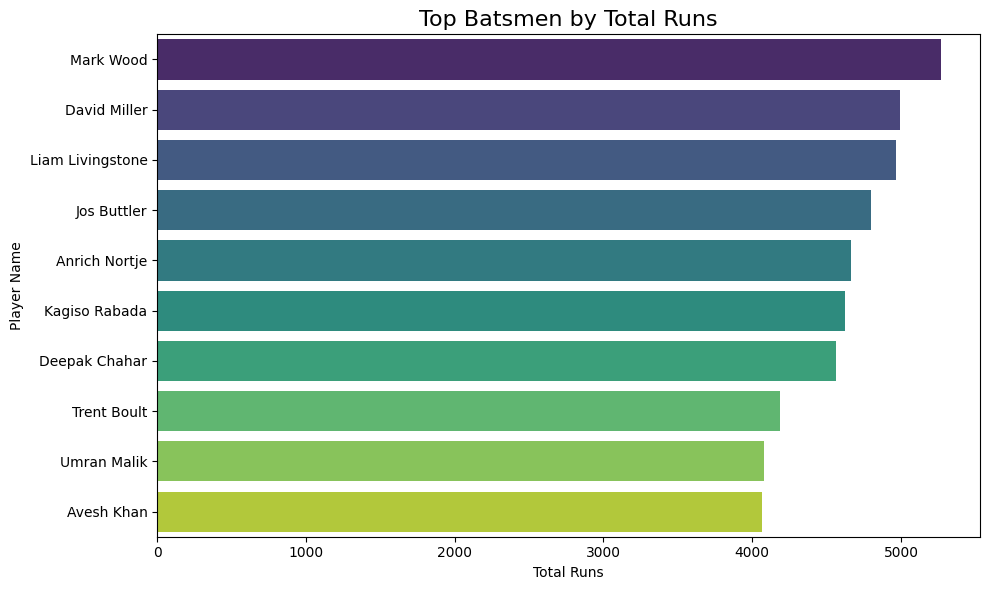

In [55]:
# Top Batsmen by Total Runs
print("\nTop Batsmen by Total Runs:")
plot_top_batsmen(data)


Top Bowlers by Wickets Taken:


C:\Users\drawe\AppData\Local\Temp\ipykernel_2420\432715215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="mako")


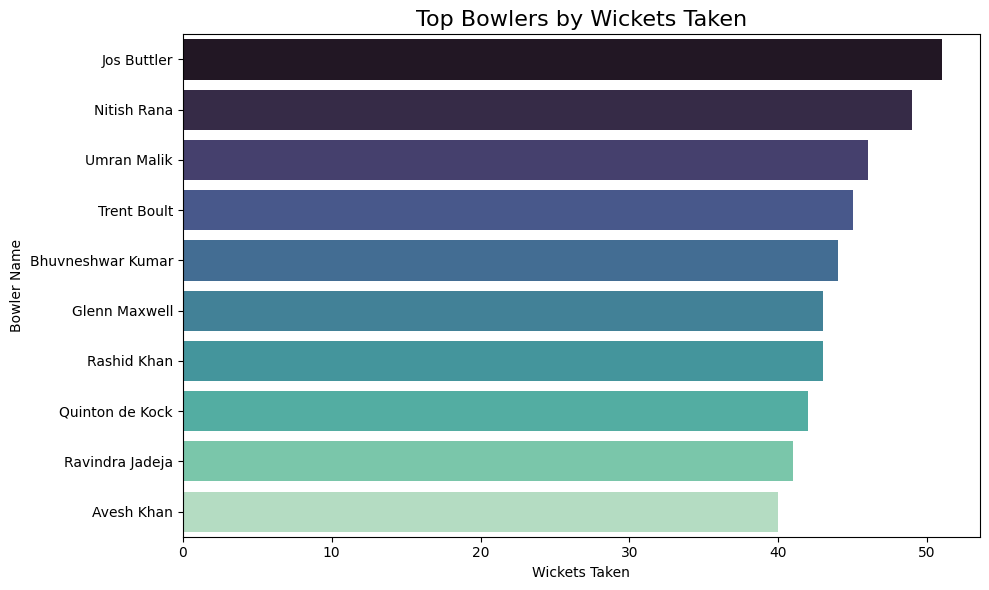

In [56]:
# Top Bowlers by Wickets Taken
print("\nTop Bowlers by Wickets Taken:")
plot_top_bowlers(data)


Team-wise Total Runs:


C:\Users\drawe\AppData\Local\Temp\ipykernel_2420\432715215.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.index, y=team_runs.values, palette="coolwarm")


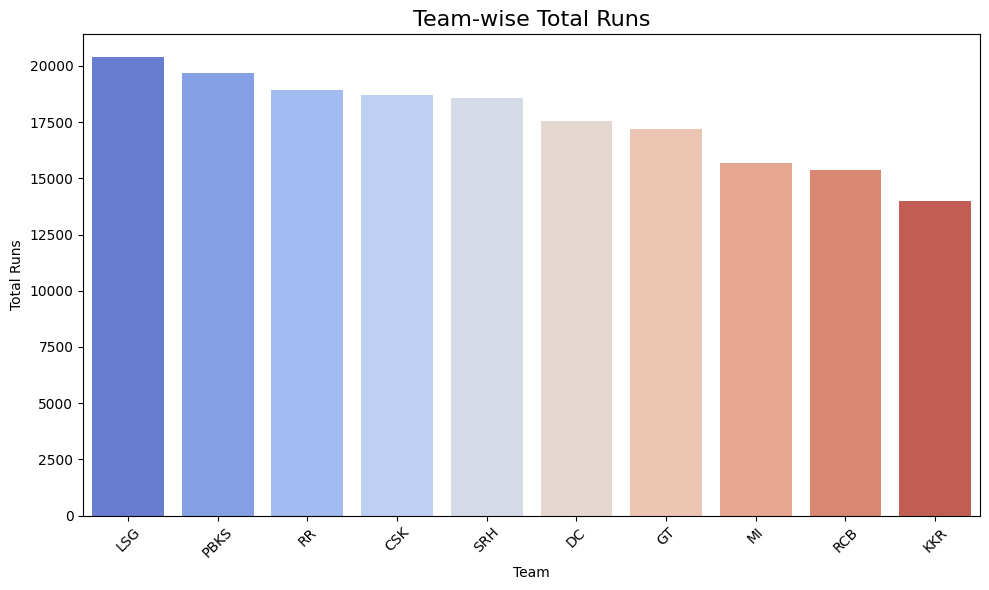

In [57]:
# Team-wise Total Runs
print("\nTeam-wise Total Runs:")
plot_team_runs(data)


Matches Played at Different Stadiums:


C:\Users\drawe\AppData\Local\Temp\ipykernel_2420\432715215.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stadium_matches.index, y=stadium_matches.values, palette="cubehelix")


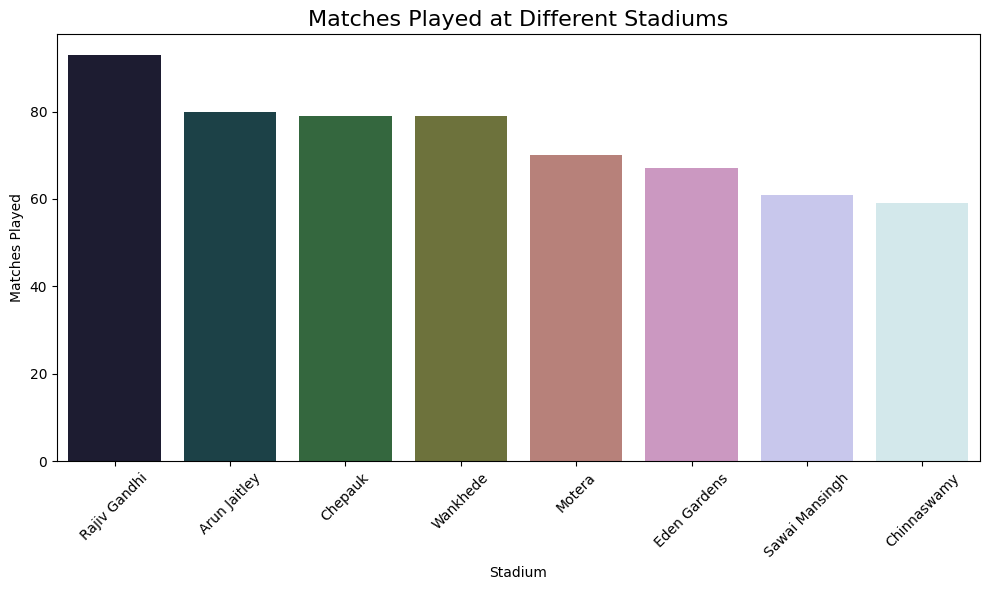

In [58]:
# Matches Played at Different Stadiums
print("\nMatches Played at Different Stadiums:")
plot_stadium_analysis(data)


Performance Trend for MS Dhoni:


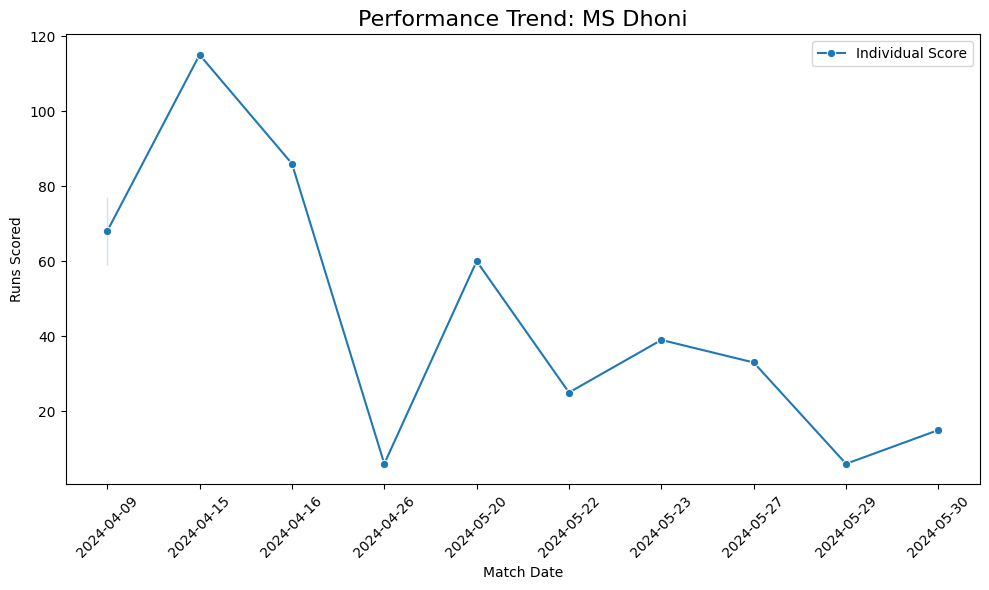

In [59]:
# Performance Trend of a Specific Player
player_name = "MS Dhoni"
print(f"\nPerformance Trend for {player_name}:")
plot_player_performance(data, player_name)


Team Performance Across Matches:


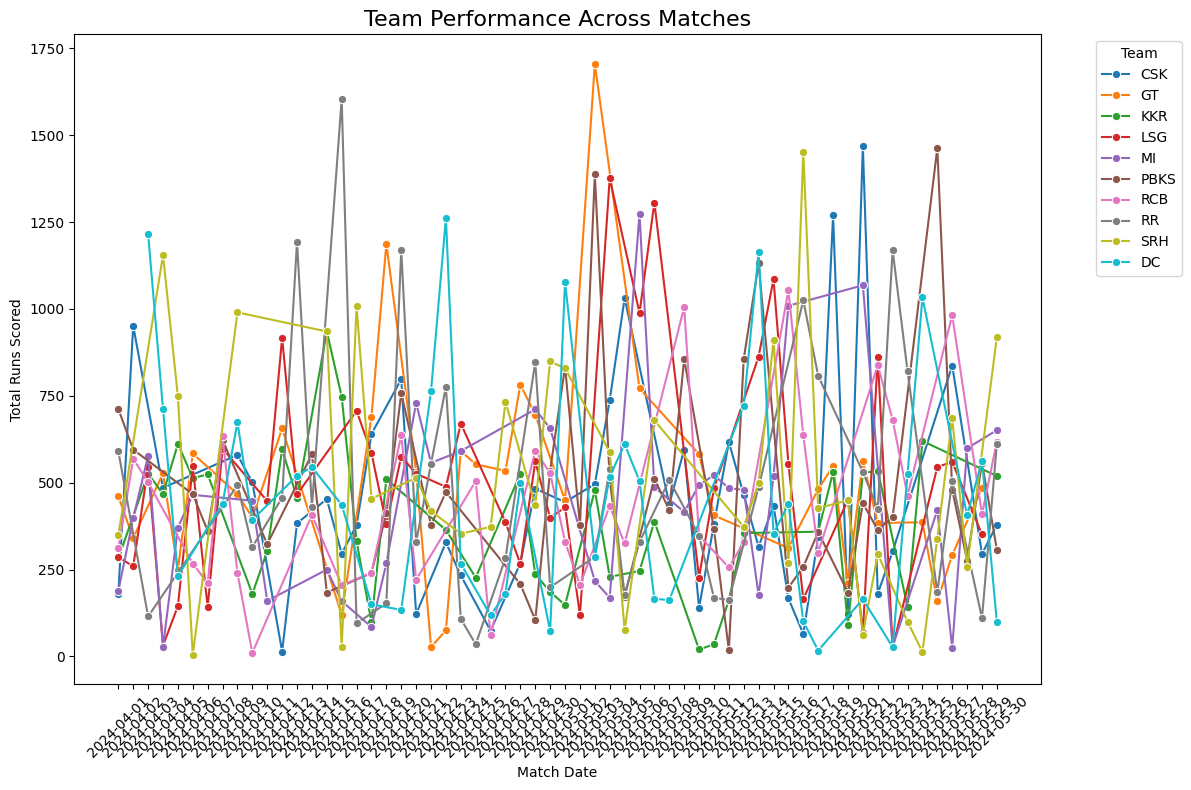

In [60]:

# Plot team performance
print("\nTeam Performance Across Matches:")
plot_team_performance(data)



Team-wise Batsmen Contribution:


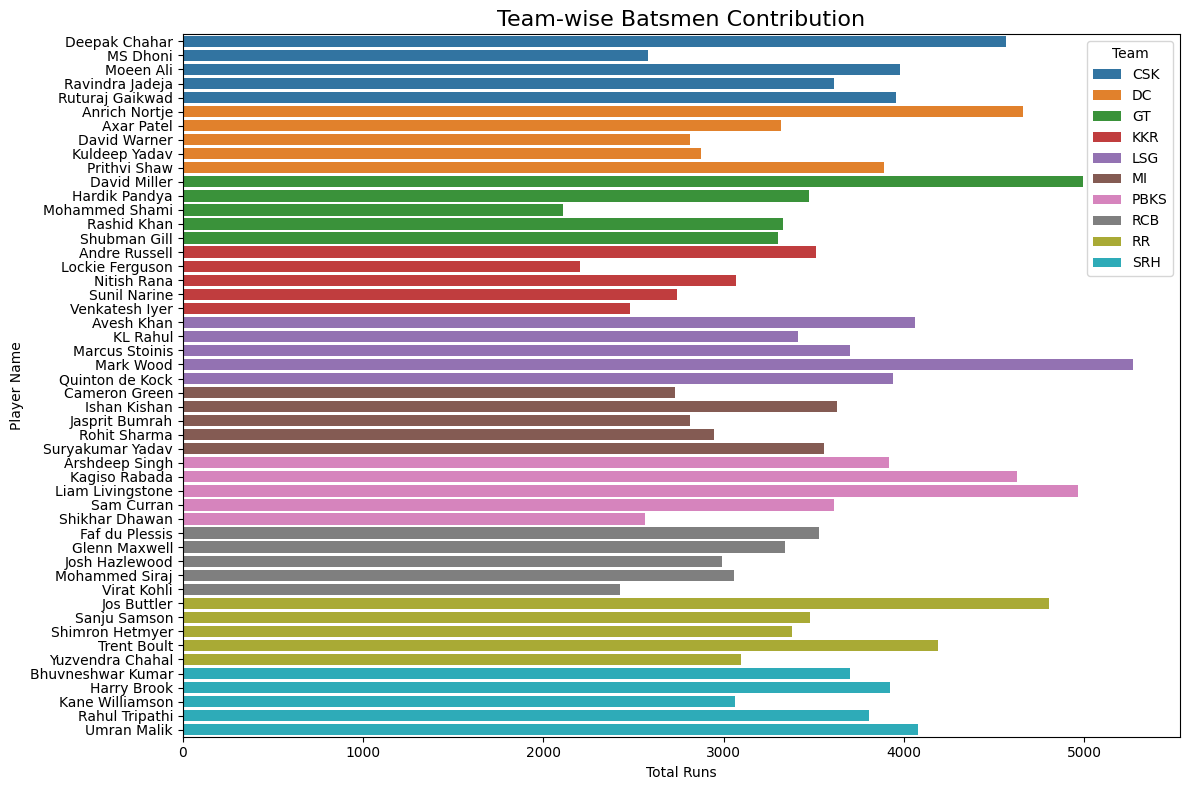

In [61]:
# Team-wise contribution of batsmen
def plot_team_batsmen_contribution(data):
    team_contribution = data.groupby(["Team", "Player Name"])["Total Score"].sum().reset_index()
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Total Score", y="Player Name", hue="Team", data=team_contribution, dodge=False, palette="tab10")
    plt.title("Team-wise Batsmen Contribution", fontsize=16)
    plt.xlabel("Total Runs")
    plt.ylabel("Player Name")
    plt.legend(title="Team")
    plt.tight_layout()
    plt.show()

# Team Batsmen Contribution
print("\nTeam-wise Batsmen Contribution:")
plot_team_batsmen_contribution(data)



Team Performance Across Matches:


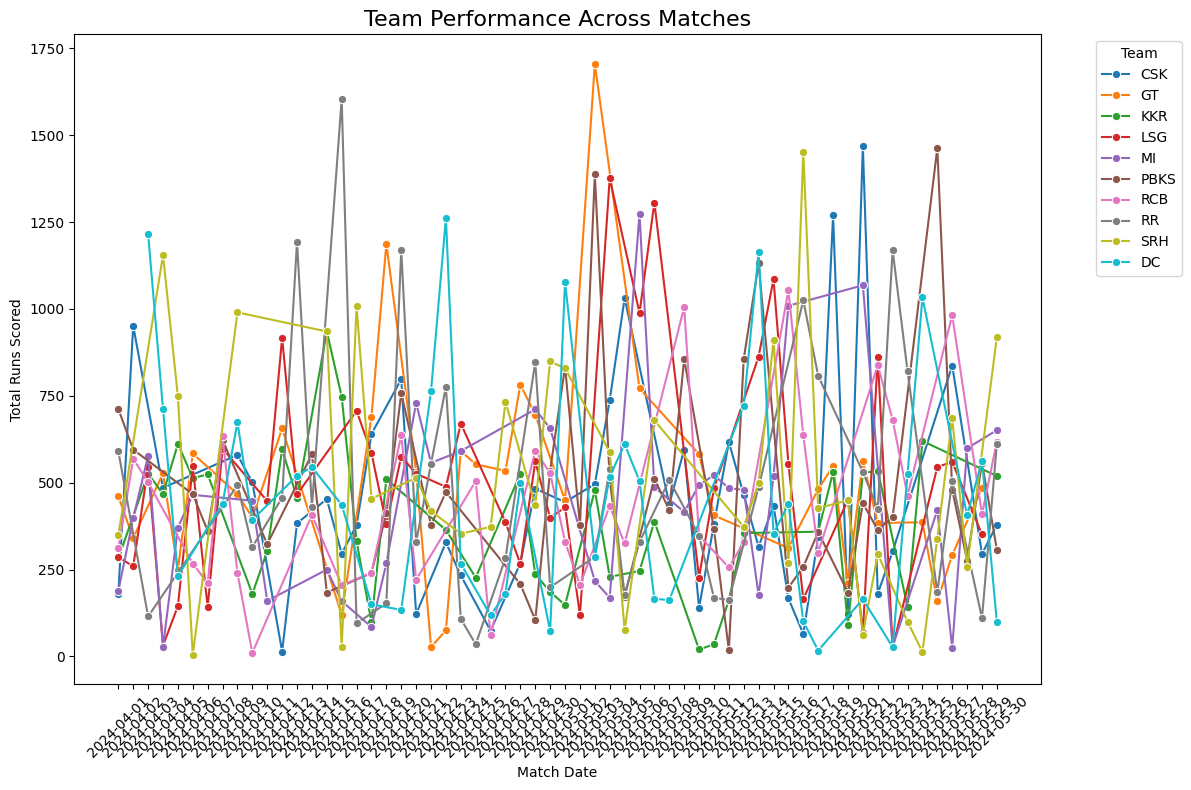

In [62]:
# Team Performance Across Matches
print("\nTeam Performance Across Matches:")
plot_team_performance(data)


Team Contribution to Total Season Score:


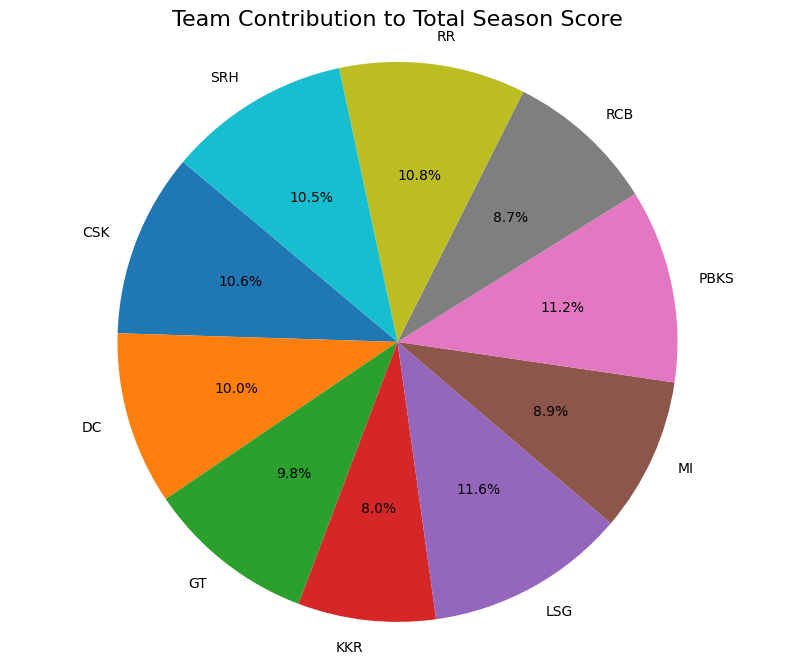

In [63]:
# Team Contribution to Total Season Score
print("\nTeam Contribution to Total Season Score:")
plot_team_contribution(data)


Total Season Score by Team:


C:\Users\drawe\AppData\Local\Temp\ipykernel_2420\432715215.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_scores.index, y=team_scores.values, palette="coolwarm")


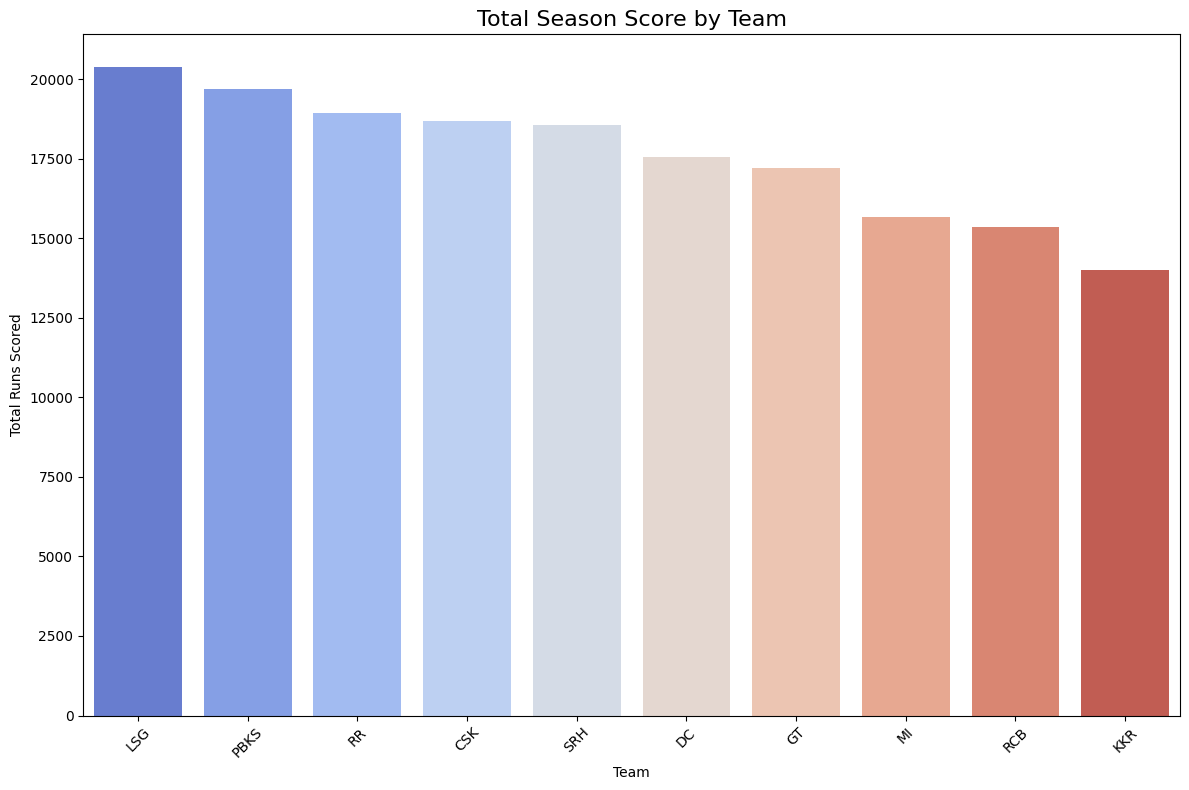

In [64]:
# Total Season Score by Team
print("\nTotal Season Score by Team:")
plot_team_total_season_score(data)